## Trading Strategy Based on Rolling Text



1. [Read the Data](#data)
2. [Sentiment Score of Rolling Text](#sentimentscorerollingtext)
3. [Trading Strategy](#tradingstrategy)
4. [Trade Level Analytics](#tradelevelanalytics)
5. [Performance Analysis](#performance)
6. [Conclusion and Next Steps](#conclusion)

## Import Libraries

In [1]:
# Import the 'datetime' module to work with date and time objects in Python
import datetime

# For data manipulation
import pandas as pd
import numpy as np

# Import utility functions 
import sys
sys.path.append('..')
from data_modules.trade_fed_utils import trade_analytics, update_signal_column, get_performance_metrics

# For data visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\varun\anaconda3\envs\quantra_py\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<a id='data'></a>
## Read the Data

Import the file `fomc_text_spy_ohlc_jan22_to_jul24.csv` using the `read_csv` method of `pandas`. <br>
This file has FOMC reports from 26th January of 2022 to 31st July of 2024 along with SPY ETF data at one-minute frequency during the FOMC live meetings.

This CSV file is available in the zip file of the unit `Python Codes and Data` in the `Summary` section.

In [2]:
# Read the CSV file into a pandas DataFrame, setting the first column as the index
fomc_data = pd.read_csv('../data_modules/fomc_text_spy_ohlc_jan22_to_jul24.csv',
                        index_col=0)

# Set the index of the DataFrame to the 'timestamp' column, making it easier to work with time series data
fomc_data.index = pd.to_datetime(fomc_data.timestamp)

# Convert the 'text' column data to a string type (useful if the column contains mixed types)
fomc_data['text'] = fomc_data['text'].astype(str)

# Sort the DataFrame by its index (timestamp) to ensure data is in chronological order
fomc_data = fomc_data.sort_index()

# Dropping the 'timestamp' column from the fomc_data DataFrame
fomc_data = fomc_data.drop(columns=['timestamp'])

# Display the first few rows of the DataFrame to check the contents
fomc_data.head()

,text,video_id,open,high,low,close
timestamp,,,,,,
2022-01-26 19:30:00+00:00,"Good afternoon. At the Federal Reserve, we are...",21,441.480,441.6151,440.76,441.2700
2022-01-26 19:31:00+00:00,Omicron variant will surely weigh on economic ...,21,441.276,441.6700,440.27,440.6195
2022-01-26 19:32:00+00:00,"the past three months. Over the past year, pay...",21,440.630,441.0800,440.31,440.5300
2022-01-26 19:33:00+00:00,well above our longer- run goal of 2 percent. ...,21,440.580,440.7000,439.80,440.0100
2022-01-26 19:34:00+00:00,we believe that the best thing we can do to su...,21,439.970,440.2840,438.42,438.9479


### Calculate the Rolling Text





In [3]:
# Create a new column 'text_rolling' by grouping the 'text' data based on the date
fomc_data['text_rolling'] = fomc_data.groupby(
    fomc_data.index.date)['text'].apply(  # Group the 'text' column by the date (fomc_data.index.date)
        lambda x: x.apply(lambda y: y + ' ').cumsum().str.strip()  # For each text entry, add a space and apply cumulative sum, then remove trailing spaces
    )

# Display the first few rows of the dataframe to inspect the changes
fomc_data.head()

,text,video_id,open,high,low,close,text_rolling
timestamp,,,,,,,
2022-01-26 19:30:00+00:00,"Good afternoon. At the Federal Reserve, we are...",21,441.480,441.6151,440.76,441.2700,"Good afternoon. At the Federal Reserve, we are..."
2022-01-26 19:31:00+00:00,Omicron variant will surely weigh on economic ...,21,441.276,441.6700,440.27,440.6195,"Good afternoon. At the Federal Reserve, we are..."
2022-01-26 19:32:00+00:00,"the past three months. Over the past year, pay...",21,440.630,441.0800,440.31,440.5300,"Good afternoon. At the Federal Reserve, we are..."
2022-01-26 19:33:00+00:00,well above our longer- run goal of 2 percent. ...,21,440.580,440.7000,439.80,440.0100,"Good afternoon. At the Federal Reserve, we are..."
2022-01-26 19:34:00+00:00,we believe that the best thing we can do to su...,21,439.970,440.2840,438.42,438.9479,"Good afternoon. At the Federal Reserve, we are..."



<a id='sentimentscorerollingtext'></a>
## Sentiment Score of Rolling Text


In [4]:
# The output of the above cell

  0%|          | 0/152 [00:00<?, ?it/s]

<a id='tradingstrategy'></a>
## Trading Strategy



In [6]:
# The output of the above cell

________________
opening long position at  2022-01-26 19:30:00+00:00
closing long position at  2022-01-26 19:36:00+00:00
________________
opening long position at  2022-03-16 18:30:00+00:00
closing long position at  2022-03-16 18:33:00+00:00
________________
opening long position at  2022-05-04 18:30:00+00:00
closing long position at  2022-05-04 18:36:00+00:00
________________
opening long position at  2022-06-15 18:30:00+00:00
closing long position at  2022-06-15 18:38:00+00:00
________________
opening long position at  2022-07-27 18:30:00+00:00
closing long position at  2022-07-27 18:31:00+00:00
________________
opening long position at  2022-09-21 18:30:00+00:00
closing long position at  2022-09-21 18:37:00+00:00
________________
opening long position at  2022-11-02 18:30:00+00:00
closing long position at  2022-11-02 18:31:00+00:00
________________
opening long position at  2022-12-14 19:30:00+00:00
closing long position at  2022-12-14 19:38:00+00:00
________________
opening long po

,Position,Entry Datetime,Entry Price,Exit Datetime,Exit Price,pnl
12,1,2024-01-31 19:30:00+00:00,485.950,2024-01-31 19:35:00+00:00,486.73,0.780
13,1,2024-03-20 18:30:00+00:00,517.450,2024-03-20 18:37:00+00:00,517.22,-0.230
14,1,2024-05-01 18:30:00+00:00,502.930,2024-05-01 18:36:00+00:00,502.81,-0.120
15,1,2024-06-12 18:30:00+00:00,542.815,2024-06-12 18:37:00+00:00,542.52,-0.295
16,1,2024-07-31 18:30:00+00:00,551.520,2024-07-31 18:35:00+00:00,550.89,-0.630


<a id='tradelevelanalytics'></a>

## Trade Level Analytics

Generate performance analytics for a trading strategy using the `trade_analytics` function to calculate various trade level statistics. Save the output dataframe with trade level analytics in the `trade_level_analytics` dataframe.

In [7]:
# The output of the above cell

,Strategy
Total pnl,0.54
total_trades,17
Number of Winners,5
Number of Losers,12
Win (%),29.41
Loss (%),70.59
per_trade_pnl_winners,2.03
per_trade_pnl_losers,0.8
Average holding time,0 days 00:05:24.705882352


Although the number of winning trades is less than the number of losing trades, the total PnL is positive since the profit per winning trade is more than the loss per losing trade.

### Update Trading Signals in DataFrame

Import the one-minute frequency data of SPY ETF from the CSV `spy_ohlc_jan22_to_jul24` and store it in the dataframe `minute_data`. This is used to calculate the performance of the trading strategy. 
Based on the trade information in the `trade_sheet`, update the `signal` column of the `minute_data` dataframe using the function `update_signal_column`.

In [8]:
# The output of the above cell

,timestamp,open,high,low,close,signal
timestamp,,,,,,
2022-01-26 00:00:00+00:00,2022-01-26 00:00:00+00:00,435.17,435.22,435.15,435.15,0
2022-01-26 00:01:00+00:00,2022-01-26 00:01:00+00:00,435.13,435.13,434.80,434.80,0
2022-01-26 00:02:00+00:00,2022-01-26 00:02:00+00:00,434.83,434.96,434.80,434.96,0
2022-01-26 00:03:00+00:00,2022-01-26 00:03:00+00:00,434.86,434.86,434.66,434.66,0
2022-01-26 00:04:00+00:00,2022-01-26 00:04:00+00:00,434.55,434.55,434.23,434.30,0


<a id='performance'></a>
## Performance Analysis

Use the function `get_performance_metrics` to calculate the performance measures and analyse the strategy.

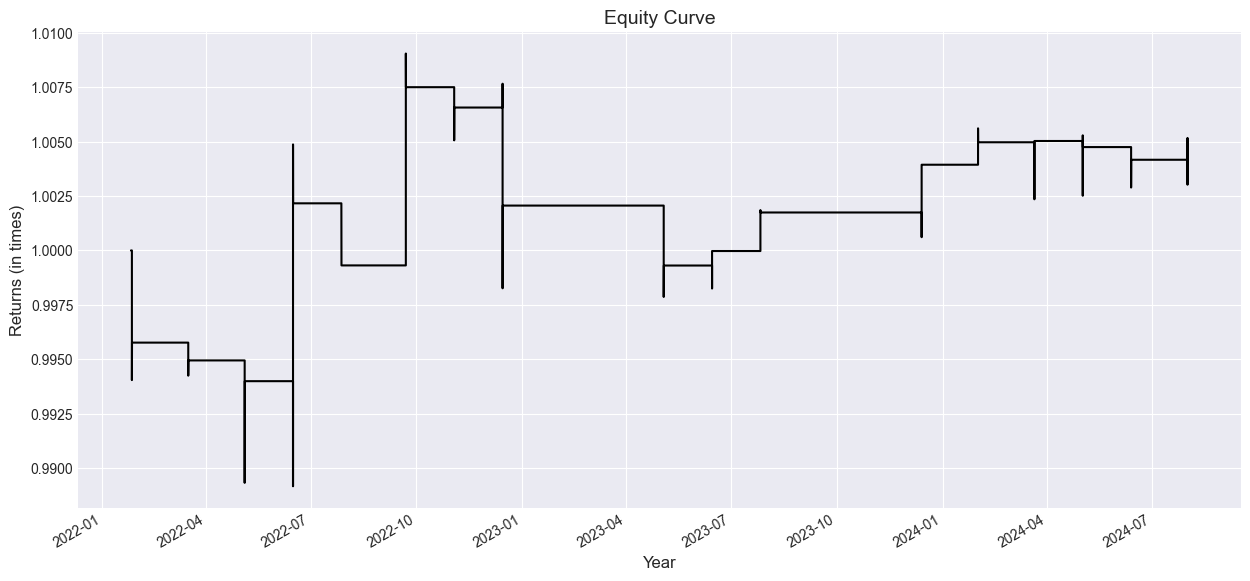

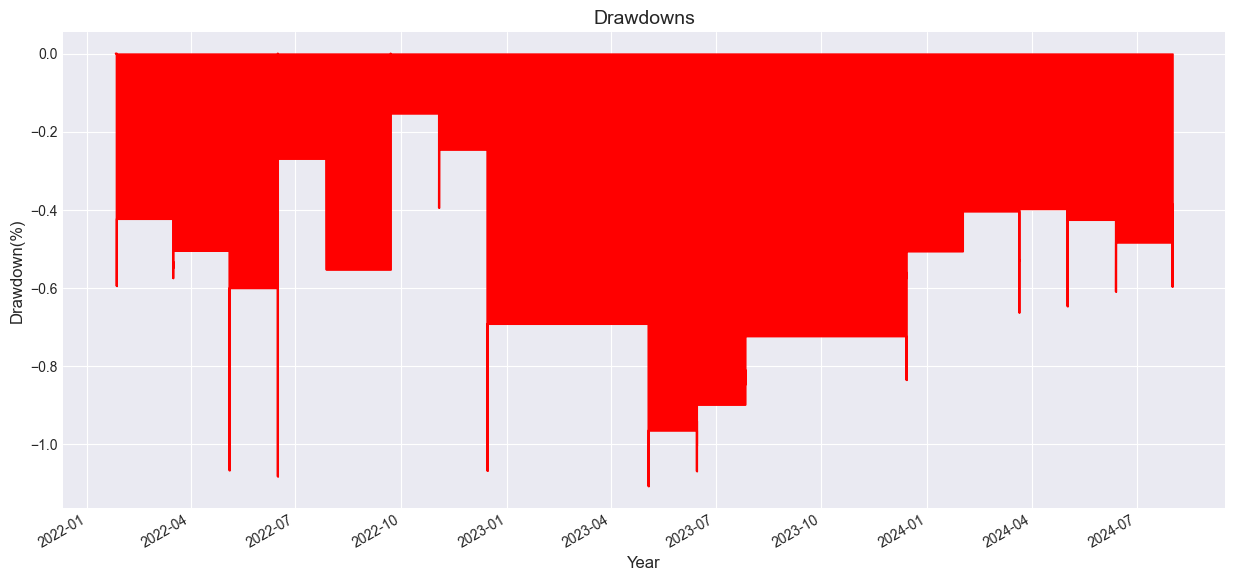

                 Strategy
CAGR                3.92%
Sharpe Ratio         0.32
Maximum Drawdown   -1.11%


In [10]:
# The output of the above cell

The strategy using the sentiment score of the rolling text generated a Sharpe ratio of 0.32 with a maximum drawdown of 1.11%. This is less than the performance of the trading strategy based on the rolling sentiment score of FOMC reports.
<a id='conclusion'></a>

## Conclusion and Next Steps
In this notebook, you tested the variation of trading strategy based on the threshold for sentiment score but it didn't greatly improve the performance of the strategy. In the upcoming notebooks, we will explore the variations of this strategy and study how the performance changes. <br><br>